# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Итак, в таблице 22 столбца. Тип данных: int64, float64, object, bool. В названиях колонок не видны нарушения стиля.

1. Количество значений в столбцах `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` отличается от всего количества объявлений. Значит, в данных есть пропущенные значения.
2. Значения в столбце `first_day_exposition` следует привести к другому формату, чтобы затем было удобно с ним работать.
3. Столбец `ceiling_height` содержит пропуски. Их придется заполнять значениями по усмотрению. Нам известно, что высота потолков в российских домах варьируется от 2.5 до 3.5 метров. Дополнительно изучим высоту потолков в нашем датафрейме (в среднем от 2.52 до 2.8 м) и примем решение о заполнении.
4. Столбец `floors_total` содержит пропуски. Их количество не такое большое. Возможно, их следует удалить. Или заполнить, учитывая этаж продаваемой квартиры. (например, выбрать ближайшее из возможных значений [5,7,9,12] - оказалось слишком сложным, пропустил) 
5. Столбец `living_area` содержит пропуски. Заполним пропуски значениями, при этом учтем отношение жилой площади к общей. Либо разобьем квартиры по категориям и найдем среднее для каждой категории - этим значением заполним пропуски.
6. Столбец `is_apartment` переполнен пропусками. Всему виной неправильный тип данных у столбца.
7. Столбец `kitchen_area` содержит пропуски. Заполним пропуски значениями, при этом учтем отношение площади кухни к общей. Либо разобьем квартиры по категориям и найдем среднее для каждой категории - этим значением заполним пропуски.
8. Столбец `balcony` содержит пропуски. Если учесть, что доля квартир с балконом/лоджией на российском рынке недвижимости составляет 75%, то можно допустить, что NaN не всегда обозначает отсутствие балкона. Вероятно, продавец не стал/забыл указать количество балконов. (Хотя в описании к проекту нашел "Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0.")
9. В некоторых строчках отсутствуют значения столбцов `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`. По условию нам известно, что эти данные были занесены автоматически. Поэтому оставим эти столбцы без изменений и сообщим команде об ошибке.
10. В столбце `days_exposition` пропуски. Так как данные заполняются автоматически, оставим их. Возможно, эти объекты еще в продаже, поэтому в данном столбце пропуск.
11. Столбцы `floors_total`, `balcony`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` следует привести к типу данных int64, так как значения этих столбцов - целые числа. Не переводится, так как есть пропуски.
12. В столбце `ceiling_height` встречается значение 100м и 1м. Следует разобраться с аномальнымим значениями.
13. Столбцы `is_apartment` и `first_day_exposition` имеют неправильный тип данных.

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

## Предобработка данных

In [6]:
#изменим тип данных у столбцов `is_apartment` и `first_day_exposition`
df['is_apartment'] = df['is_apartment'].astype('bool')
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

In [7]:
#проверка изменений
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_ar

In [8]:
df['is_apartment'].value_counts()

True     20974
False     2725
Name: is_apartment, dtype: int64

Если учесть долю продаж апартаментов в 10% в среднем по стране, то можно предположить, что значения False означают, что объект является апартаментом. Не додумался, как поменять местами значения, поэтому решил переименовать столбец.

In [9]:
df = df.rename(columns={'is_apartment' : 'isNot_apartment'})

In [10]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'isNot_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [11]:
# подсчёт пропусков
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
isNot_apartment             0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0.

In [12]:
df['balcony'] = df['balcony'].fillna(0)

Пропуски в столбце `floors_total` можно восстановить, если известен этаж квартиры из объявления о продаже. Но учитывая, что пропусков всего 86 штук, то, вероятно, лучше просто избавиться от этих строчек, так как в дальнейшем мы будем определять первый-последний-другой этаж квартиры.

Так же мало пропусков в столбце `locality_name`. Вероятно, лучше просто избавиться от этих строчек.

In [13]:
df = df.dropna(subset=['floors_total', 'locality_name'])

Если учесть зависимость этажности дома от высоты потолков и заполнить медианой группируя по этажности дома, пропуски в столбце `ceiling_height` можно восстановить точнее.

In [14]:
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('floors_total')['ceiling_height'].transform('median'))

Если учесть зависимость жилой площади от общей и заполнить медианой группируя по общей площади, пропуски в столбце `living_area` можно восстановить точнее.

In [15]:
df['living_area'] = df['living_area'].fillna(df.groupby('total_area')['living_area'].transform('median'))

Если учесть зависимость площади кухни от общей и заполнить медианой группируя по общей площади, пропуски в столбце `kitchen_area` можно восстановить точнее.

In [16]:
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('total_area')['kitchen_area'].transform('median'))

In [17]:
df.duplicated().sum()

0

Явных дубликатов в данных нет!

In [18]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Бросается в глаза повтор "посёлок Мурино", 'поселок Мурино', 'Мурино'

In [19]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              1
floors_total                0
living_area               133
floor                       0
isNot_apartment             0
studio                      0
open_plan                   0
kitchen_area              185
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

К сожалению, в столбцах `living_area` и `kitchen_area` остались пропуски. Это произошло из-за нестандартных значений (не целых) в столбце `total_area`.
Можно округлить значения в столбце `total_area` до ближайшего целого или кратного 0.1 для уточнения данных. Но возможно стоит их просто дропнуть?

Также необходимо почистить пропуски в столбце `ceiling_height` и улучшить данные. С учетом того, что высота потолков в российских домах варьируется от 2.5 до 3.5 метров, то имеет смысл почистить данные от лишних значений.

In [20]:
df = df.query('2.5 <= ceiling_height <= 4')

In [21]:
#изменим тип данных у столбцов  `floors_total`, `balcony`, `airports_nearest`, `cityCenters_nearest`,
#`parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition`
columns_to_replace = ['floors_total', 'balcony']
for row in columns_to_replace:
    df[row] = df[row].astype('int')

**Вывод**

Почистили данные: заполнили/удалили пропуски, убрали аномальные значения, изменили тип данных в некоторых столбцах.

## Расчёты и добавление результатов в таблицу

In [22]:
#добавим в таблице цену квадратного метра для каждой квартиры - отдельный столбец
#цена за квадратный метр = цена объекта / общую площадь
df['price_per_meter'] = df['last_price'] / df['total_area']

In [23]:
#добавим день недели, месяц и год публикации объявления
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].astype('datetime64[M]')
df['year'] = df['first_day_exposition'].dt.year

In [24]:
#добавим этаж квартиры: первый, последний, другой
df['floor_type'] = df['floor']
df['floor_type'] = df['floor_type'].where(df['floor_type'] != 1, 'первый')
df['floor_type'] = df['floor_type'].where(df['floor_type'] != df['floors_total'], 'последний')
fl = ['первый', 'последний']
df['floor_type'] = df['floor_type'].where(df['floor_type'].isin(fl), 'другой')

In [25]:
#добавим соотношение жилой и общей площади, а также отношение площади кухни к общей
df['living_rate'] = df['living_area'] / df['total_area']
df['kitchen_rate'] = df['kitchen_area'] / df['total_area']

In [26]:
#проверка
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,isNot_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,floor_type,living_rate,kitchen_rate
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,2.0,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,True,...,0.0,NaN,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,True,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,95.0,9,True,...,3.0,234.0,424.0,408176.100629,4,7,2015,другой,0.597484,0.094340
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000


**Вывод**

Добавили семь столбцов с данными.

## Исследовательский анализ данных

In [27]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,living_rate,kitchen_rate
count,23415.000000,2.341500e+04,23415.000000,23415.000000,23415.000000,23415.000000,23283.000000,23415.000000,23231.000000,23415.000000,...,7967.000000,17960.000000,8974.000000,20268.000000,2.341500e+04,23415.000000,23415.000000,23415.000000,23283.000000,23231.000000
mean,9.879436,6.500781e+06,60.188874,2.068802,2.705142,10.694939,34.375045,5.883792,10.442751,0.592313,...,490.715075,0.767929,518.594607,180.595175,9.930937e+04,2.567756,6.399829,2017.371130,0.565201,0.186846
std,5.677875,1.075529e+07,35.079579,1.076793,0.219111,6.592049,21.505804,4.871821,5.754142,0.959285,...,342.362795,0.937513,278.127869,219.643162,4.989185e+04,1.788060,3.492752,1.037539,0.102628,0.071251
min,0.000000,1.219000e+04,12.000000,0.000000,2.500000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,6.000000,3.420000e+06,40.000000,1.000000,2.550000,5.000000,18.600000,2.000000,7.000000,0.000000,...,287.500000,0.000000,293.000000,45.000000,7.666667e+04,1.000000,3.000000,2017.000000,0.499157,0.135000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,454.000000,0.000000,503.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.570607,0.171429
75%,14.000000,6.761696e+06,69.655000,3.000000,2.750000,16.000000,42.200000,8.000000,11.800000,1.000000,...,612.000000,1.000000,731.000000,231.000000,1.141705e+05,4.000000,10.000000,2018.000000,0.633934,0.229730
max,50.000000,7.630000e+08,900.000000,19.000000,4.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.787879


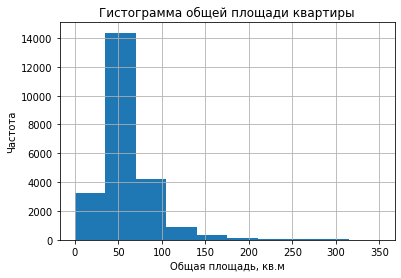

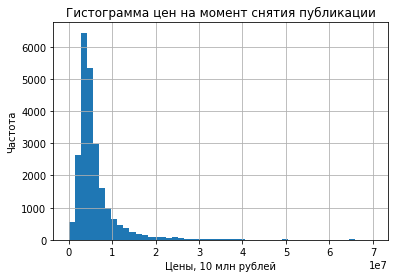

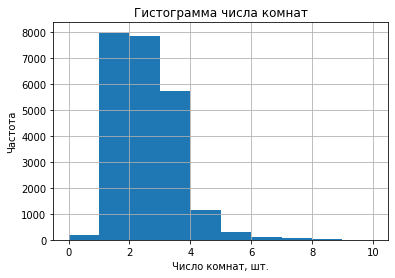

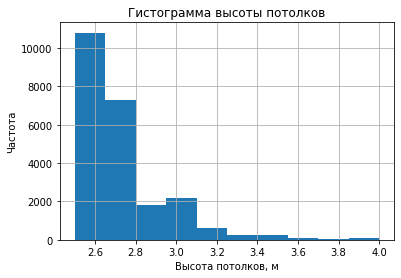

In [28]:
#Строю гистограммы для следующих параметров: площадь, цена, число комнат, высота потолков.
df['total_area'].hist(bins=10,range=(0,350))
plt.title('Гистограмма общей площади квартиры')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Частота')
plt.show()
df['last_price'].hist(bins=50,range=(0,70000000))
plt.title('Гистограмма цен на момент снятия публикации')
plt.xlabel('Цены, 10 млн рублей')
plt.ylabel('Частота')
plt.show()
df['rooms'].hist(bins=10,range=(0,10))
plt.title('Гистограмма числа комнат')
plt.xlabel('Число комнат, шт.')
_ = plt.ylabel('Частота')
plt.show()
df['ceiling_height'].hist(bins=10)
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков, м')
_ = plt.ylabel('Частота')

Первый график, на котором отображена площадь квартир, а также данные о значениях столбца говорят о том, что в нашем датафрейме больше всего квартир площадью от 40 до 70 кв.м.

Второй график с ценой квартир и данные об этом столбце говорят, что больше всего квартир на продажу стоимостью от 3.4млн до 6.7 млн.

Третий график с высотой потолков показывает, что чаще встречаются однокомнатные и двухкомнтаные квартиры, трехкомнатных немного меньше.

Последний график с высотой потолков говорит нам о том, что наиболее распространненые квартиры с потолками 2.5-2.6 метров, квартиры с потолками от 2.6 до 2.8 встречаются чуть реже.

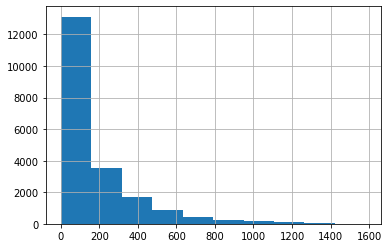

In [29]:
#посмотрим время продажи квартир
df['days_exposition'].hist(bins=10)

График говорит нам, что чаще всего продажа квартиры происходит спустя примерно 150 дней после публикации объявления.

In [30]:
df['days_exposition'].mean()

180.59517465956188

In [31]:
df['days_exposition'].median()

95.0

Учитывая выбросы, можно утверждать, что медианное время продажи составляет 95 дней. Квартиль Q1 составляет 45 дней, значит можно сказать, что продажи, прошедшие быстрее данного срока, являются очень быстрыми. Квартиль Q3 - 231 день, значит все, что больше, назовем очень долгими продажами.

В среднем площаль объектов не превышает 200м, а межквартильный размах лежит между 40 и 70кв.м. Значит можно убрать редкие значения.

In [32]:
df = df.query('total_area < 200')

Стоимость большинства квартир лежит в пределах 10 млн, а межквартильный размах - от 3 до 7 млн. Значит можно оставить квартиры стоимостью до 40 млн.

In [33]:
df = df.query('last_price < 40000000')

Количество комнат в квартирах можно оставить до 6. Все, что больше, встречается очень редко.

In [34]:
df = df.query('rooms < 6')

Высоту потолков уже почистили в прошлом пункте.

От изначальных 23699 осталось 20676 записей. Но теперь данные кажутся более репрезентативными.

In [36]:
#проверим, какие факторы больше всего влияют на стоимость квартиры
df[['last_price', 'price_per_meter', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,price_per_meter,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.710941,0.772139,0.466678,-0.336194
price_per_meter,0.710941,1.000000,0.184609,-0.052512,-0.377741
total_area,0.772139,0.184609,1.000000,0.782528,-0.220531
rooms,0.466678,-0.052512,0.782528,1.000000,-0.146298
cityCenters_nearest,-0.336194,-0.377741,-0.220531,-0.146298,1.000000


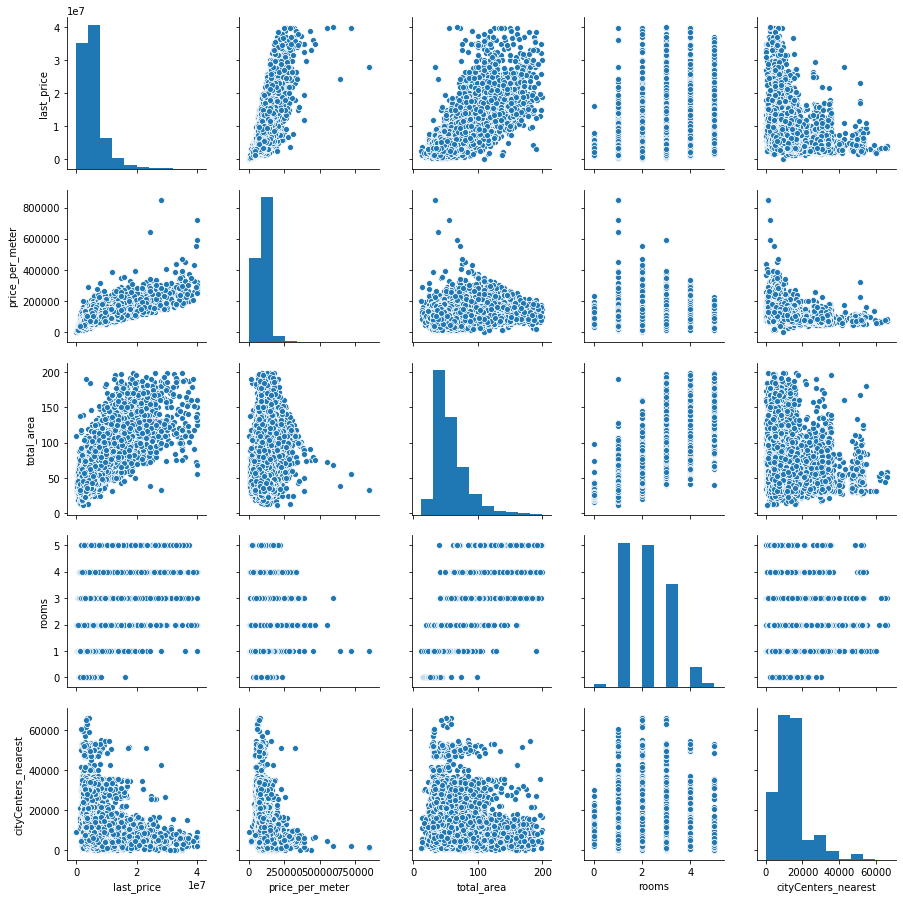

In [37]:
sns.pairplot(df[['last_price', 'price_per_meter', 'total_area', 'rooms', 'cityCenters_nearest']])

Больше всего на стоимость квартиры влияет площадь квартиры - выраженная связь (кф 0.77). Связь между ценой и количеством комнат не такая выраженная (кф 0.47)

Связь между ценой и расстоянием от центра тоже не выраженная.

Также не просматривается связь между ценой и датой размещения. Кф там ничтожно малы.

Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом

In [38]:
display(df.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = 'median'))

,last_price
floor_type,
другой,4800000.0
первый,3900000.0
последний,4250000.0


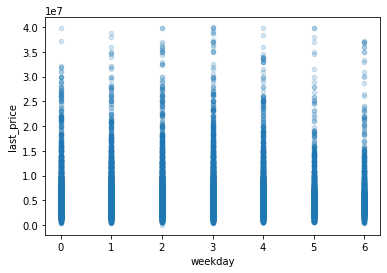

In [39]:
df.plot(x='weekday', y='last_price',kind='scatter', alpha=0.2)

Как видим, цены на квартиры на первом и последнем этажах значительно ниже, чем на других. Покупатели обходят их стороной.

In [40]:
#10 населённых пунктов с наибольшим числом объявлений
df['locality_name'].value_counts().head(10)

Санкт-Петербург      15186
посёлок Мурино         518
посёлок Шушары         439
Всеволожск             396
Пушкин                 359
Колпино                336
посёлок Парголово      325
Гатчина                306
деревня Кудрово        299
Выборг                 234
Name: locality_name, dtype: int64

Так как посёлок Мурино вошел в топ-10, а ранее мы установили, что существуют дубликаты - заменим их.

In [41]:
df['locality_name'] = df['locality_name'].where(df['locality_name'] != "поселок Мурино", 'посёлок Мурино')

In [42]:
df['locality_name'] = df['locality_name'].where(df['locality_name'] != "Мурино", 'посёлок Мурино')

In [43]:
df['locality_name'].value_counts().head(10)

Санкт-Петербург      15186
посёлок Мурино         584
посёлок Шушары         439
Всеволожск             396
Пушкин                 359
Колпино                336
посёлок Парголово      325
Гатчина                306
деревня Кудрово        299
Выборг                 234
Name: locality_name, dtype: int64

In [44]:
#посчитаем среднюю цену квадратного метра в этих населённых пунктах
locat_name = [
    'Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск', 'Колпино',
    'Пушкин', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово', 'Выборг'
]
for locat in locat_name:
    display(df.query('locality_name == @locat')['price_per_meter'].mean())

111638.12590129599

86018.11091105604

78551.34454526326

68670.45963853838

75352.47558300219

103167.73174946205

90362.34519962795

68757.67864392416

92473.54757579972

58190.128008363914

Как видим, самое дорогое жилье находится в Санкт-Петербурге и Пушкине.

Дешевле всего квадратный метр можно купить в Выборге.

Чтобы далее все корректно работало, все-таки необходимо почистить данные от пропусков.

In [45]:
df['cityCenters_nearest'].isna().sum()

5446

In [46]:
df = df.dropna(subset=['cityCenters_nearest'])

In [47]:
#создадим столбец с расстоянием до центра города в км
df_spb = df[df['locality_name'] == 'Санкт-Петербург']
df_spb['cityCenters_km'] = df_spb['cityCenters_nearest'] / 1000
df_spb['cityCenters_km'] = df_spb['cityCenters_km'].round()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [48]:
#считаем среднюю цену для каждого километра
df_spb.groupby('cityCenters_km')['price_per_meter'].mean()

cityCenters_km
0.0     162551.594128
1.0     146017.485403
2.0     135230.903177
3.0     118182.694272
4.0     127704.673361
5.0     135449.536547
6.0     136507.152196
7.0     138982.829319
8.0     123879.351371
9.0     113201.504184
10.0    112827.449466
11.0    108160.433255
12.0    107519.160501
13.0    108159.282393
14.0    104227.073580
15.0    104311.210330
16.0    100558.618080
17.0     97032.021474
18.0     96463.547029
19.0     98658.388032
20.0    103019.848584
21.0     94469.584582
22.0     91330.425050
23.0     91720.609367
24.0     85736.904595
25.0     91531.371618
26.0     87798.872892
27.0    132115.709459
28.0     81161.915320
29.0     72953.365445
Name: price_per_meter, dtype: float64

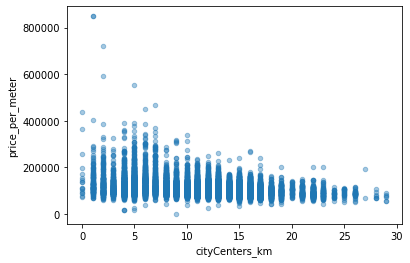

In [49]:
df_spb.plot(x='cityCenters_km', y='price_per_meter',kind='scatter', alpha=0.4)

Как видно на графике, начиная с 7км от центра города увеличивается цена за квадратный метр. На 5 и 6км квартиры с ценой кв.м. выше 200 тысяч встречаются чаще. Будем считать, что объекты, находящиеся в 7км от центра, находятся в центральной зоне.

In [50]:
#выделим квартиры в центральной зоне
df_spb_center = df_spb.query('cityCenters_km <= 7')

In [51]:
df_spb.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,living_rate,kitchen_rate,cityCenters_km
count,15132.000000,1.513200e+04,15132.000000,15132.000000,15132.000000,15132.000000,15059.000000,15132.000000,15039.000000,15132.000000,...,15132.000000,7610.000000,13202.000000,15132.000000,15132.000000,15132.000000,15132.000000,15059.000000,15039.000000,15132.000000
mean,10.156159,6.898037e+06,60.584347,2.091197,2.721659,11.528020,34.686758,6.266389,10.656317,0.589479,...,0.751652,525.251117,179.992956,111513.331222,2.554520,6.430545,2017.356794,0.565563,0.186547,11.749405
std,5.717572,4.584146e+06,27.235282,0.987201,0.227992,6.377228,17.718080,4.908152,5.427243,0.970173,...,0.911333,280.703658,222.246018,34759.703278,1.780129,3.464292,1.051344,0.102005,0.070865,4.772324
min,0.000000,1.219000e+04,12.000000,0.000000,2.500000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,13.000000,1.000000,111.834862,0.000000,1.000000,2014.000000,0.038462,0.043524,0.000000
25%,6.000000,4.200000e+06,41.500000,1.000000,2.550000,6.000000,19.400000,3.000000,7.100000,0.000000,...,0.000000,299.000000,42.000000,90909.090909,1.000000,3.000000,2017.000000,0.500000,0.135000,9.000000
50%,10.000000,5.450000e+06,54.000000,2.000000,2.700000,9.000000,31.000000,5.000000,9.500000,0.000000,...,1.000000,509.000000,93.000000,104417.635659,2.000000,6.000000,2017.000000,0.571150,0.170968,12.000000
75%,14.000000,7.800000e+06,72.000000,3.000000,2.800000,16.000000,43.300000,9.000000,12.000000,1.000000,...,1.000000,746.000000,226.000000,123445.244912,4.000000,10.000000,2018.000000,0.634921,0.228571,15.000000
max,50.000000,3.999000e+07,199.200000,5.000000,4.000000,52.000000,164.700000,33.000000,65.000000,5.000000,...,3.000000,1337.000000,1572.000000,848484.848485,6.000000,12.000000,2019.000000,1.000000,0.787879,29.000000


In [52]:
df_spb_center.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,living_rate,kitchen_rate,cityCenters_km
count,3158.000000,3.158000e+03,3158.000000,3158.000000,3158.000000,3158.000000,3144.000000,3158.000000,3136.000000,3158.000000,...,3158.000000,2283.000000,2663.000000,3158.000000,3158.000000,3158.000000,3158.000000,3144.000000,3136.000000,3158.000000
mean,10.072198,1.061174e+07,79.788306,2.578847,2.942872,7.187777,46.744711,4.187777,13.190786,0.319506,...,1.277074,471.569426,240.802478,133440.621366,2.509816,6.442685,2017.190310,0.579051,0.176138,4.530082
std,5.913042,6.504877e+06,33.597530,1.083739,0.314239,3.940146,22.794864,2.986171,7.005826,0.759403,...,1.081500,272.909445,270.326019,54055.797011,1.721061,3.444714,1.115818,0.110492,0.079294,1.658780
min,0.000000,1.600000e+06,12.000000,0.000000,2.500000,2.000000,2.000000,1.000000,2.000000,0.000000,...,0.000000,22.000000,3.000000,15345.268542,0.000000,1.000000,2014.000000,0.038462,0.047059,0.000000
25%,6.000000,6.490000e+06,54.825000,2.000000,2.700000,5.000000,30.000000,2.000000,8.900000,0.000000,...,0.000000,230.000000,60.000000,99785.515351,1.000000,3.000000,2017.000000,0.516612,0.123333,4.000000
50%,10.000000,8.600000e+06,74.000000,3.000000,3.000000,6.000000,43.450000,4.000000,11.300000,0.000000,...,1.000000,460.000000,135.000000,121839.983805,3.000000,6.000000,2017.000000,0.592492,0.154414,5.000000
75%,14.000000,1.250000e+07,98.100000,3.000000,3.100000,9.000000,59.200000,5.000000,15.200000,0.000000,...,2.000000,678.000000,332.000000,151157.729585,4.000000,10.000000,2018.000000,0.655172,0.207378,6.000000
max,50.000000,3.999000e+07,198.000000,5.000000,4.000000,25.000000,164.700000,25.000000,64.000000,5.000000,...,3.000000,1293.000000,1572.000000,848484.848485,6.000000,12.000000,2019.000000,0.972222,0.625000,7.000000


In [53]:
df_spb_center[['last_price', 'price_per_meter', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,price_per_meter,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.651196,0.692448,0.380315,-0.039743
price_per_meter,0.651196,1.000000,-0.019424,-0.220703,0.028693
total_area,0.692448,-0.019424,1.000000,0.767821,-0.139972
rooms,0.380315,-0.220703,0.767821,1.000000,-0.188032
cityCenters_nearest,-0.039743,0.028693,-0.139972,-0.188032,1.000000


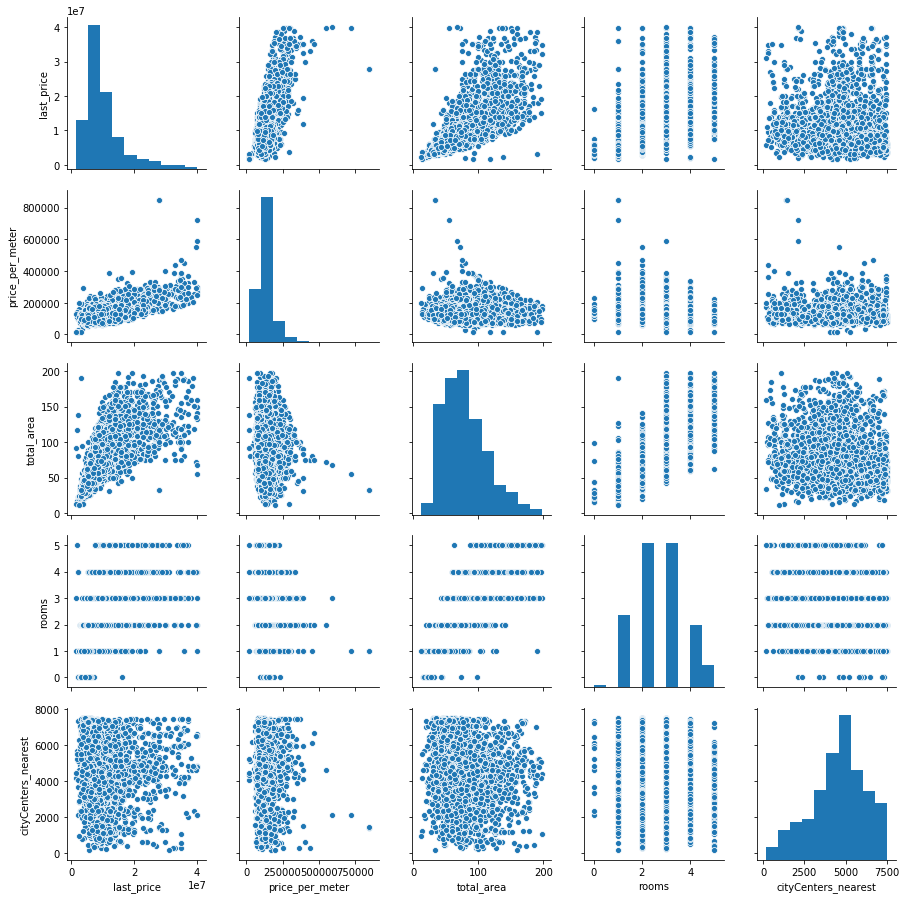

In [57]:
sns.pairplot(df_spb_center[['last_price', 'price_per_meter', 'total_area', 'rooms', 'cityCenters_nearest']])

In [55]:
display(df_spb_center.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = 'median'))

,last_price
floor_type,
другой,9000000.0
первый,6490000.0
последний,8600000.0


Всего в центральной зоне оказалось 3158 квартир.

На стоимость квартиры влияет ее площадь - мы наблюдаем выраженную связь. Менее выраженную связь мы видим между ценой и числом комнат.

Близость к центру уже заложена в цену квартир в центральной зоне, но наблюдается небольшая зависимость - увеличение стоимости по мере приближения к центру.

Также отметим, что квартиры на первом этаже оцениваются значительно ниже квартир, расположенных на других этажах.

Дата размещения объявления не влияет на стоимость квартиры. (околонулевые кф)


- Средняя площадь квартир в центральной зоне выше, чем в среднем по городу (79vs60)
- Средняя высота потолков тоже выше (2.94vs2.72)
- Среднее количество комнат тоже немного выше (2.57vs2.09)
- Средняя цена квартир значительно превышает среднее значение по городу (11млн vs 7млн)
- Последний этаж в центральной зоне не является недостатком, в отличие от остального города.

Можно сделать вывод, что данные отличаются от средних по городу.

## Общий вывод

По итогам исследования можем выделить параметры, влияющие на цену квартиры в Санкт-Петербурге и соседних населённых пунктах:

- площадь квартиры
- число комнат
- этаж
- удаленность от центра (для Санкт-Петербурга)


Кроме того, в центре Санкт-Петербурга площадь, комнатность и расположение квартиры на последнем этаже меньше влияет на цену, чем в остальном городе.